<a href="https://colab.research.google.com/github/Victor-Mutuku/Neural-Networks-Deep-Learning-/blob/main/Victor_Mutuku_CS_DA02_25021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [ ]:
# Preprocess the data
X_train = X_train / 255.0  # Normalize pixel values to [0,1]
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train, 10)  # One-hot encode labels
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Checking how many images are in the dataset
print(len(X_train))
print(len(X_test))

60000
10000


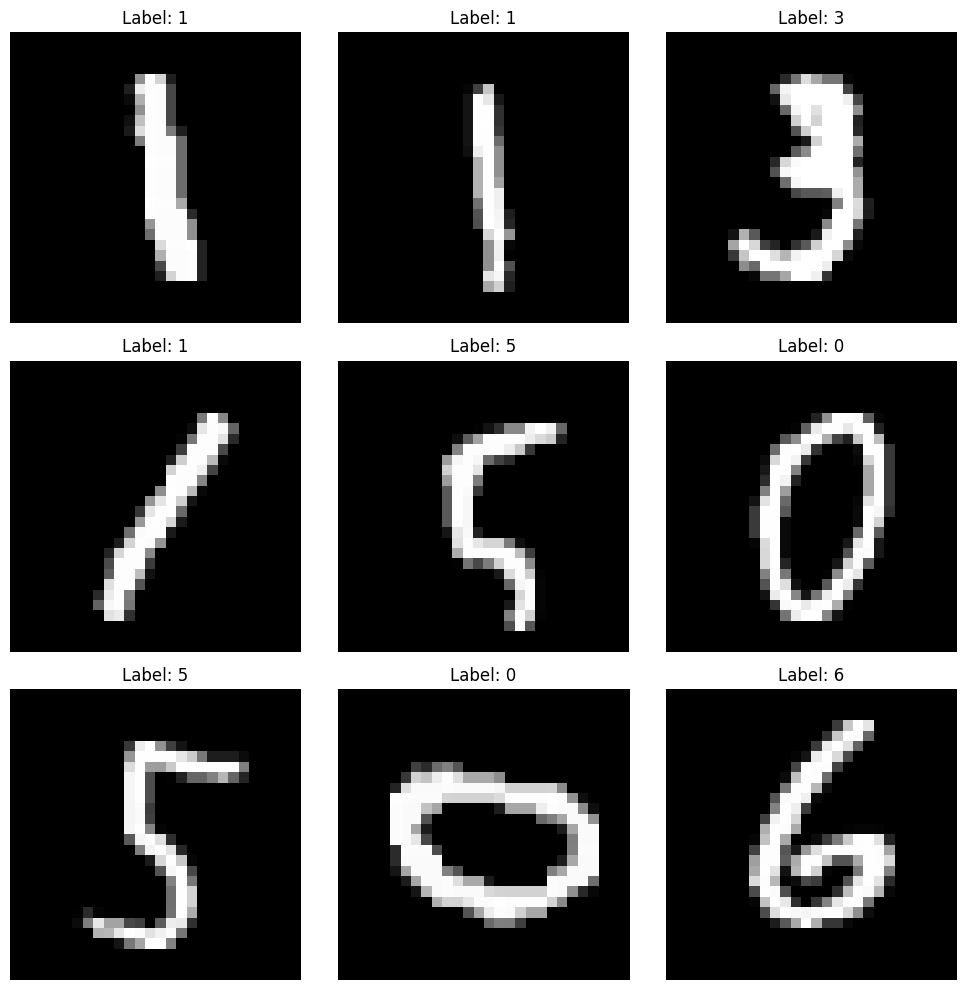

In [ ]:
# Plot some digits from the dataset
selected_indices =[6,8,10,23,100,1000,3500,4500,6000]
plt.figure(figsize=(10,10))
for i,idx in enumerate(selected_indices):
  plt.subplot(3,3,i+1) # Places the next image in the (i+1)th position of the grid
  plt.imshow(X_train[idx], cmap='gray') # Displays an image from the dataset
  plt.title(f"Label: {y_train[idx]}")
  plt.axis('off')
plt.tight_layout() # prevents overlapping
plt.show()


In [12]:
# Build the ANN Model
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128, activation='relu'), #fully connected layer with 128 neurons
  Dropout(0.3), #randomly drops 30% of neurons during training to prevent overfitting
  Dense(64, activation='relu'),
  Dropout(0.3),
  Dense(10, activation='softmax') #output layer for 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the Model
model.compile(optimizer='adam',                # how to update weights{adam 'Adaptive Moment Estimation' automatically adjusts the learning rate for each parameter}
              loss='categorical_crossentropy', # categorical_crossentropy measures how wrong the predictions are compared to true labels andpenalizes the model when the predicted probabilities(from softmax) are far from true labels
              metrics=['accuracy'])            # what to report(accuracy)
# Compile tell Keras how to this model

In [14]:
# Train the Model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

#epochs=10,the model will see the dataset 10 times
#y_train_cat trains the model in one hot format

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7089 - loss: 0.9253 - val_accuracy: 0.9572 - val_loss: 0.1503
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9236 - loss: 0.2617 - val_accuracy: 0.9667 - val_loss: 0.1096
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9424 - loss: 0.1987 - val_accuracy: 0.9733 - val_loss: 0.0933
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9499 - loss: 0.1664 - val_accuracy: 0.9748 - val_loss: 0.0826
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9585 - loss: 0.1411 - val_accuracy: 0.9743 - val_loss: 0.0813
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9634 - loss: 0.1237 - val_accuracy: 0.9770 - val_loss: 0.0749
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9642 - loss: 0.1178 - val_accuracy: 0.9760 - val_loss: 0.0760
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9669 - loss: 0.1099 - val_accuracy: 0

In [20]:
# Evaluate the set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat) # This function measures the model's performance on unseen data
print(f"Test Accuracy: {test_accuracy:.4f}")  # Gets percentage of images  correctly classified in 4 decimal places

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0882
Test Accuracy: 0.9777


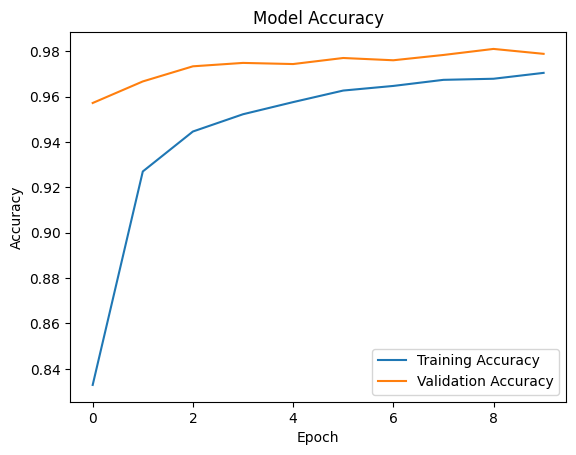

In [21]:
#Visualize Training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


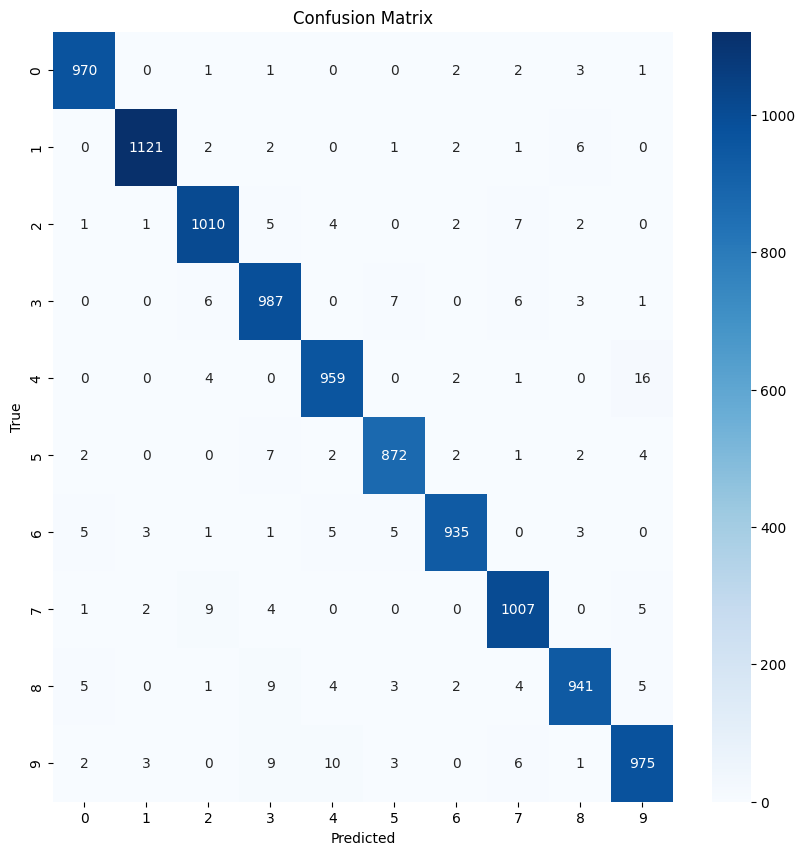

In [47]:
# Confusion Matrix
y_pred = model.predict(X_test) # The models at every image in the X_test
y_pred_classes = np.argmax(y_pred, axis=1) # Converts probabilities to predicted labels by finding the index of the largest number in each probability list
cm  = confusion_matrix(y_test, y_pred_classes) # Compares true labels with predicted labels
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
# Classification report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [46]:
# Save and reload the model
model.save("My_MNIST_ANN_Model.h5")

from tensorflow.keras.models import load_model

reloaded_model=load_model("My_MNIST_ANN_Model.h5")
reloaded_model.evaluate(X_test,y_test_cat) # Evaluates the model on the  test dataset again

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0882


[0.07572809606790543, 0.9776999950408936]